In [3]:
import pandas as pd
import obspy 
import os
import re
import logging
import obspy.signal.interpolation as itp
import obspy.core.stream 
import obspy.core.trace
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import data_day_processing as ddp

#os.chdir(os.path.normpath(os.getcwd() + os.sep + os.pardir))


In [8]:
os.chdir("D:/Popocatepetl")

## Test *create_empty_day*

In [4]:
tr = ddp.create_empty_day("2023", "01", "01")
print(tr)

CN.PPPP..HHZ | 2023-01-01T00:00:00.000000Z - 2023-01-01T23:59:59.990000Z | 100.0 Hz, 8640000 samples


In [8]:
print(tr.stats)

         network: CN
         station: PPPP
        location: 
         channel: HHZ
       starttime: 2023-01-01T00:00:00.000000Z
         endtime: 2023-01-01T23:59:59.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640000
           calib: 1.0


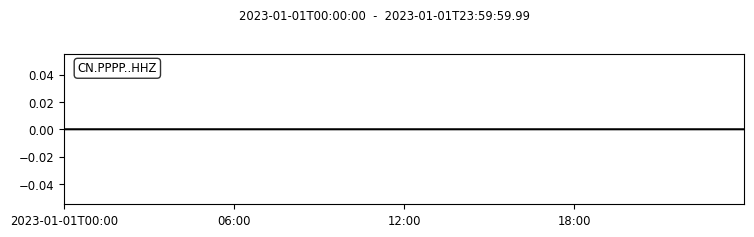

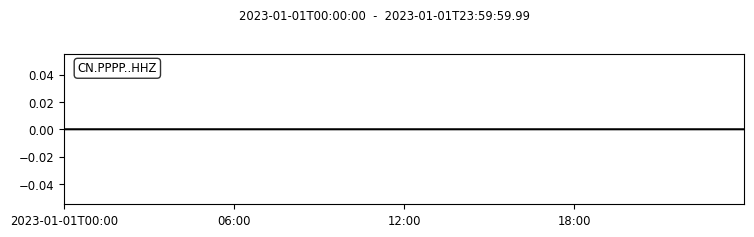

In [9]:
tr.plot()

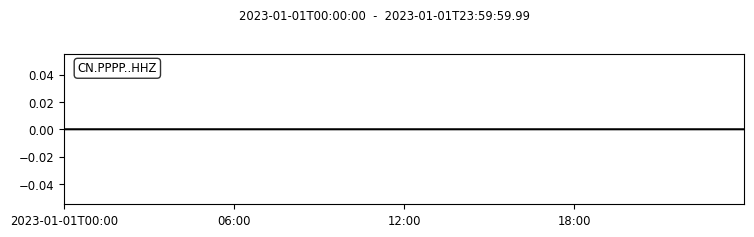

In [12]:
ax = tr.plot()            # tr.plot() returns a matplotlib Axes
fig = ax.get_figure()
fig.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\empty_day.pdf", bbox_inches="tight", dpi=300)
plt.close(fig)

## Test *interpolate_hour*

In [9]:
st = obspy.read("data/2023/11/09/CN.PPPP._20231109_170000.seed")
st = st.select(component='Z')
st = st.decimate(factor=2, no_filter=True)
print(st)

3 Trace(s) in Stream:
CN.PPPP..HHZ | 2023-11-09T17:00:00.000000Z - 2023-11-09T17:51:56.950000Z | 100.0 Hz, 311696 samples
CN.PPPP..HHZ | 2023-11-09T17:58:37.365000Z - 2023-11-09T17:59:13.715000Z | 100.0 Hz, 3636 samples
CN.PPPP..HHZ | 2023-11-09T17:59:14.595000Z - 2023-11-09T17:59:59.995000Z | 100.0 Hz, 4541 samples


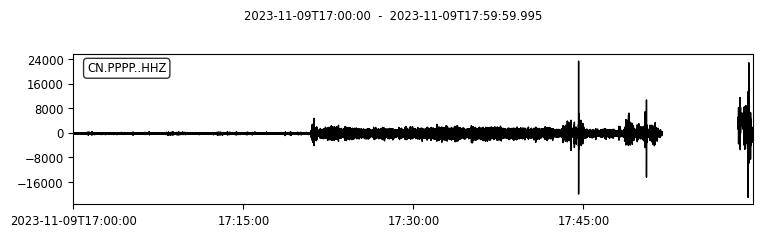

In [10]:
ax = st.plot()
fig = ax.get_figure()
fig.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\slided_hour.pdf", bbox_inches="tight", dpi=300)
plt.close(fig)

In [11]:
tr = ddp.interpolate_hour(st)
print(tr)

CN.PPPP..HHZ | 2023-11-09T17:00:00.000000Z - 2023-11-09T18:00:00.000000Z | 100.0 Hz, 360001 samples


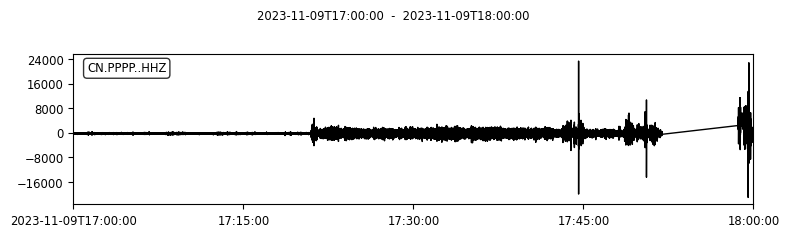

In [12]:
ax = tr.plot()
fig = ax.get_figure()
fig.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\interpolated_hour.pdf", bbox_inches="tight", dpi=300)
plt.close(fig)

In [13]:
tr.stats

         network: CN
         station: PPPP
        location: 
         channel: HHZ
       starttime: 2023-11-09T17:00:00.000000Z
         endtime: 2023-11-09T18:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 360001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 2085, 'encoding': 'STEIM1', 'byteorder': '>', 'record_length': 512, 'filesize': 3417088})
      processing: ['ObsPy 1.4.2: decimate(factor=2::no_filter=True::strict_length=False)']

## Test *complete_day*

In [14]:
Year, Month, Day = ("2023","05","21")
paths = os.listdir("data/"+Year+"/"+Month+"/"+Day)
paths_PPPP = [x for x in paths if re.match(r'^{}'.format('CN.PPPP'), x)]
source_path = "D:\\Popocatepetl\\data"
tr = ddp.complete_day(Year, Month, Day, source_path, paths_PPPP)

In [15]:
print(tr)

CN.PPPP..HHZ | 2023-05-21T00:00:00.000000Z - 2023-05-21T23:59:59.990000Z | 100.0 Hz, 8640000 samples


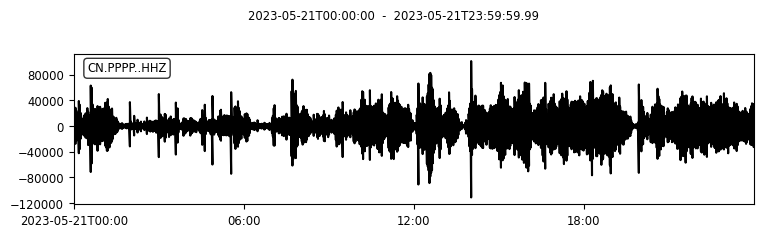

In [16]:
ax = tr.plot()
fig = ax.get_figure()
fig.savefig(r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\img\ReporteEstancia\complete_day.pdf", bbox_inches="tight", dpi=300)
plt.close(fig)

## Test process_date_range

In [19]:
ddp.process_date_range("2022-03-18", "2022-12-31", r"C:\Users\javie\OneDrive - INSTITUTO TECNOLOGICO AUTONOMO DE MEXICO\MaestriaEnCienciaDeDatos\EstanciaDeInvestigacion\Popocatepelt\PopocatepetlVolcano\logs", "D:/Popocatepetl/data", "D:/Popocatepetl/processed_data")